# Project 9
#### Thomas Irwin

### Part 1

For this project, I did a further analysis on the outcomes of first year students at Whitman College. My goal for this project was to create a tool for incoming students at Whitman College.

My imagined scenario is a student who wants to take a difficult course sometime in their freshman year, but wants to find the best scheduling strategy. Which courses best compliment this course? Is it better to take the course in the spring once this student has found their bearings? Additionally, how could the Whitman administration use this analysis for course offerings and advising purposes?

First, we need to define success. I want a metric that is intuitive and easily comparable. I know that I may lose specifics, but for the purposes of providing broad generalizations, I don't particularly mind. 

The metric I used is added medians for each of the fall/spring pairing for the two given courses, which I refer to as "Total GPA."

I've included some exploratory code I used as I was re-investigating the data set. 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
indiv = pd.read_excel("STEM Outcomes Individual Data 2002 - 2018 (anon).xlsx")
grades = pd.read_excel("STEM Outcomes Grades 2002 - 2018 (anon).xlsx")

In [71]:
print(len(indiv))
print(len(grades))

6766
75805


In [72]:
indiv.head()


,Unnamed: 0,Student ID,Start Term,End Date,Gender,Races,Ethnicity,First Generation,Major 1,Major 2,Major 3
0,0,-93682460119976992,2002FA,2005-05-22,F,WH,NHS,N,GE.AS,NaN,NaN
1,1,6162924226455414784,2002FA,2004-02-02,F,WH,NHS,N,NaN,NaN,NaN
2,2,-8298550864126102528,2002FA,2006-05-21,F,WH,NHS,N,GEOL,NaN,NaN
3,3,2287868604364420096,2002FA,2006-05-21,F,WH,NHS,N,ASNS,NaN,NaN
4,4,5188866498457584640,2002FA,2007-05-20,F,WH,NHS,N,ART,NaN,NaN


In [73]:
grades.head()

,Unnamed: 0,Student ID,Term,Academic Division,Subject,Course Number,Course Title,Credits,Grade
0,0,6602904443393593344,2004SP,2,THTR,126,Beginning Acting II,3,4.0
1,1,6602904443393593344,2004FA,2,THTR,225,Intermediate Acting,4,3.7
2,2,-2039589217076994048,2005SP,1,SSRA,104,Stretch and Strength,1,NaN
3,3,5859295354834180096,2007FA,2,MUS,300,Foreign Diction - Singers,3,4.0
4,4,5859295354834180096,2008SP,2,MUS,252,SpEns:Chamber Singers,1,4.0


In [74]:
math_grades = grades[(grades["Subject"] == "MATH") & (grades["Course Number"] == 225)]

In [75]:
math_grades = math_grades[math_grades["Course Number"] == 225]

In [76]:
math_grades

,Unnamed: 0,Student ID,Term,Academic Division,Subject,Course Number,Course Title,Credits,Grade
65,65,-4951052364792913920,2003SP,3,MATH,225,Calculus III,4,4.0
174,174,8194935347251002368,2004FA,3,MATH,225,Calculus III,4,3.3
198,198,-718625941903548288,2017SP,3,MATH,225,Calculus III,4,3.7
217,217,-3770815134055052800,2010SP,3,MATH,225,Calculus III,4,1.0
304,304,-8088322079901219840,2003SP,3,MATH,225,Calculus III,4,3.0
...,...,...,...,...,...,...,...,...,...
75456,75456,4621391436657051648,2018SP,3,MATH,225,Calculus III,4,2.0
75483,75483,4971633472316557312,2017FA,3,MATH,225,Calculus III,4,4.0
75597,75597,-1256089431470343936,2018SP,3,MATH,225,Calculus III,4,4.0
75640,75640,-3560550113868125184,2017FA,3,MATH,225,Calculus III,4,3.3


In [77]:
MG_fall = math_grades[math_grades['Term'].str.contains('FA')]

In [78]:
MG_spring = math_grades[math_grades['Term'].str.contains('SP')]

In [79]:
def create_hist(class_info):
    grades = class_info['totalGPA']
    plt.hist(grades, bins=10, edgecolor='black')
    plt.title('Histogram of Grades')
    plt.xlabel('Grades')
    plt.ylabel('Frequency')
    plt.show()

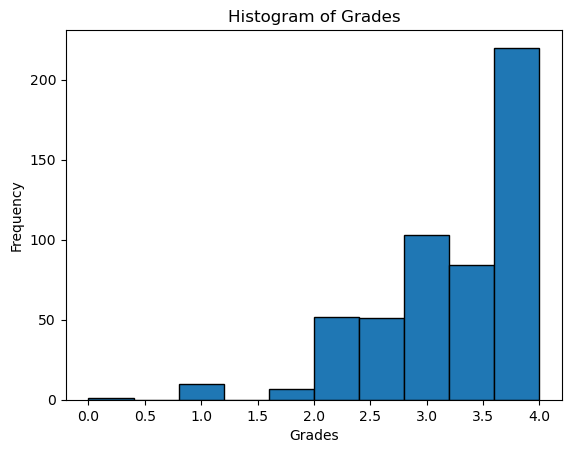

In [80]:
tempgrades = MG_spring['Grade']

plt.hist(tempgrades, bins=10, edgecolor='black')
plt.title('Histogram of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

In [81]:
MG_fall['Grade'].describe()

count    340.000000
mean       3.408824
std        0.721588
min        0.000000
25%        3.000000
50%        3.700000
75%        4.000000
max        4.000000
Name: Grade, dtype: float64

In [82]:
MG_spring['Grade'].describe()

count    528.000000
mean       3.247727
std        0.709995
min        0.000000
25%        3.000000
50%        3.300000
75%        4.000000
max        4.000000
Name: Grade, dtype: float64

### Part 2

There are three tools I wanted to create:
1) Given two classes, find the best schedule to take both.
2) Given a single class, find the best complementary pair from all classes and the optimum schedule.
3) Given a single class and a list of subjects, find the best complementary pair from each subject and the optimum schedule.


First, we need a metric for success. The metric I used is ading medians for each of the fall/spring pairing for the two given courses, which I refer to as "Total GPA."

This first function produces the most detailed analysis of the two classes, but it is the hardest to scale. I don't use the median metric here, as the intention of this function is to provide the tools for a student to make the most informed decision possible for themeselves. 

In [83]:
def create_hist(class_info):
    #give a pandas df with a category of "totalGPA", produce a histogram. 
    grades = class_info['totalGPA']
    plt.hist(grades, bins=10, edgecolor='black')
    plt.title('Histogram of Grades')
    plt.xlabel('Grades')
    plt.ylabel('Frequency')
    plt.show()

def compare_two_full(class_info1, class_info2):
    #class_info1 and class_info2 are both dictionaries of the form: {"Subject": XXX, "Course Number": Y}
    #where XXX is the official acronym for the subject and Y is the three digit course number.
    
    #This function produces the full information about the best possible fall/spring pairing as well as an 
    #histogram for each pairing.
    
    #The pairings are taking both in fall (both_fall), taking both in spring (both spring), taking class1 in the fall
    #and class2 in the spring (fall1) and class2 in the fall and class1 in the spring (fall2).
    
    #get grade information for class 1
    grade_info_class1 = grades[(grades["Subject"] == class_info1["Subject"]) & (grades["Course Number"] == class_info1["Course Number"])]
    #split grade information for fall and spring
    class1fall =  grade_info_class1[grade_info_class1['Term'].str.contains('FA')]
    class1spring =  grade_info_class1[grade_info_class1['Term'].str.contains('SP')]
    
    #get grade information for class 2 and split.
    grade_info_class2 = grades[(grades["Subject"] == class_info2["Subject"]) & (grades["Course Number"] == class_info2["Course Number"])]
    class2fall =  grade_info_class2[grade_info_class2['Term'].str.contains('FA')]
    class2spring =  grade_info_class2[grade_info_class2['Term'].str.contains('SP')]
    print("Students who took both class in the fall:")
    
    #merges the two fall datasets on student ID, so only students who took both in the fall are included
    both_fall = class1fall.merge(class2fall, on='Student ID')
    
    #show the distribution of "totalGPA", which is the added GPA's of each of the courses.
    both_fall["totalGPA"] = both_fall["Grade_x"] + both_fall["Grade_y"]
    print(both_fall["totalGPA"].describe())
    #create_hist takes in a dataset with a "totalGPA" variable and produces a histogram for it.
    create_hist(both_fall)
    print("-------------------")
    
    #repeat process for both_spring, fall1, fall2.
    print("Students who took both class in the spring:")
    both_spring = class1spring.merge(class2spring, on='Student ID')
    both_spring["totalGPA"] = both_spring["Grade_x"] + both_spring["Grade_y"]
    print(both_spring["totalGPA"].describe())
    create_hist(both_spring)
    print("-------------------")
    print("Students who took " + class_info1["Subject"] + " in the Fall and " + class_info2["Subject"] + " in the Spring" )
    fall1 = class1fall.merge(class2spring, on='Student ID')
    fall1["totalGPA"] = fall1["Grade_x"] + fall1["Grade_y"]
    print(fall1["totalGPA"].describe())
    create_hist(fall1)
    print("-------------------")
    print("Students who took " + class_info2["Subject"] + " in the Fall and " + class_info1["Subject"] + " in the Spring" )
    fall2 = class2fall.merge(class1spring, on='Student ID')
    fall2["totalGPA"] = fall2["Grade_x"] + fall2["Grade_y"]
    print(fall2["totalGPA"].describe())
    create_hist(fall2)
    print("-------------------")
    


Students who took both class in the fall:
count    16.000000
mean      7.212500
std       0.739256
min       6.000000
25%       6.850000
50%       7.150000
75%       8.000000
max       8.000000
Name: totalGPA, dtype: float64


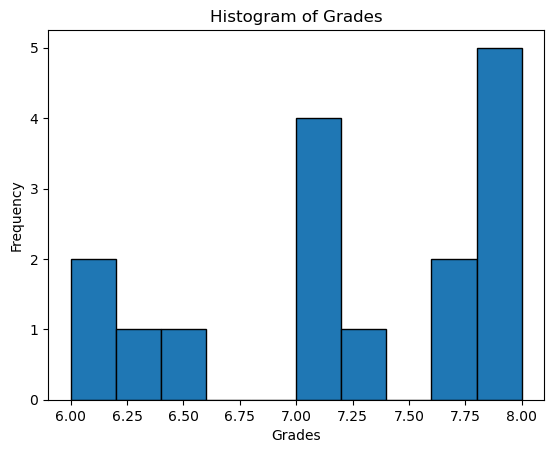

-------------------
Students who took both class in the spring:
count    51.000000
mean      6.870588
std       1.048293
min       3.000000
25%       6.300000
50%       7.000000
75%       7.700000
max       8.000000
Name: totalGPA, dtype: float64


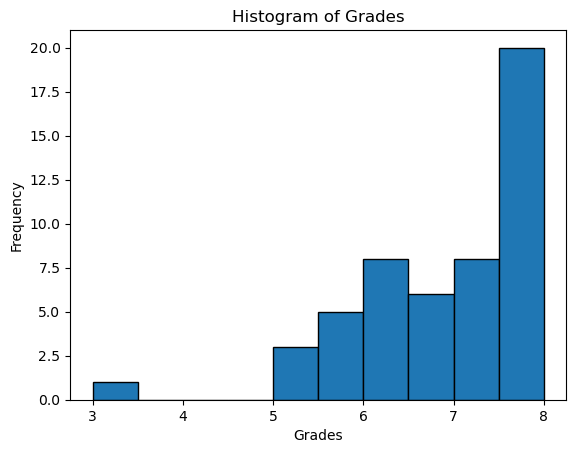

-------------------
Students who took PSYC in the Fall and MATH in the Spring
count    49.000000
mean      6.857143
std       1.079545
min       3.000000
25%       6.300000
50%       7.000000
75%       7.700000
max       8.000000
Name: totalGPA, dtype: float64


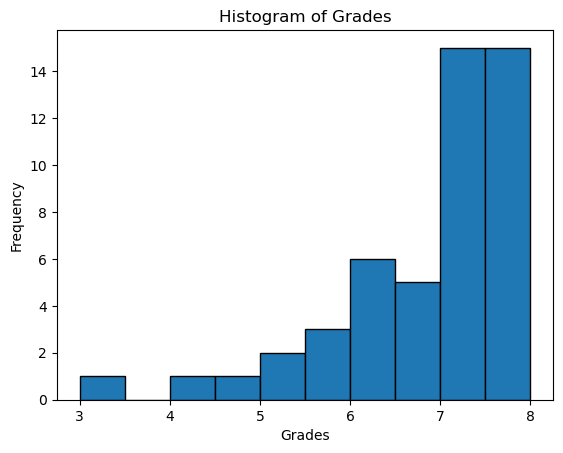

-------------------
Students who took MATH in the Fall and PSYC in the Spring
count    36.000000
mean      7.122222
std       0.909980
min       4.400000
25%       6.700000
50%       7.150000
75%       8.000000
max       8.000000
Name: totalGPA, dtype: float64


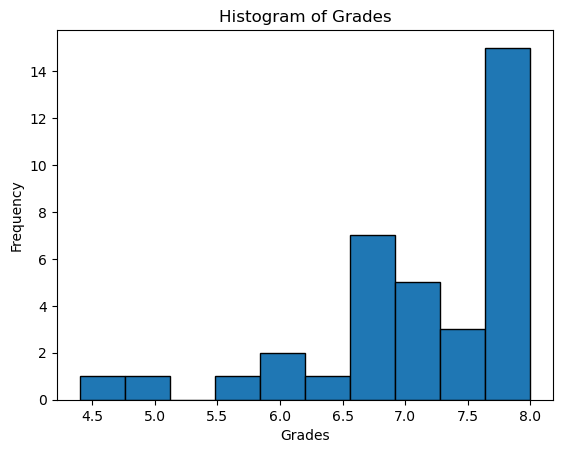

-------------------


In [84]:
class1 = {"Subject" : "PSYC", "Course Number" : 110}
class2 = {"Subject" : "MATH", "Course Number" : 225}

compare_two_full(class1, class2)


Students who took both class in the Fall:
count    10.000000
mean      6.510000
std       1.185514
min       4.700000
25%       6.000000
50%       6.650000
75%       7.525000
max       8.000000
Name: totalGPA, dtype: float64


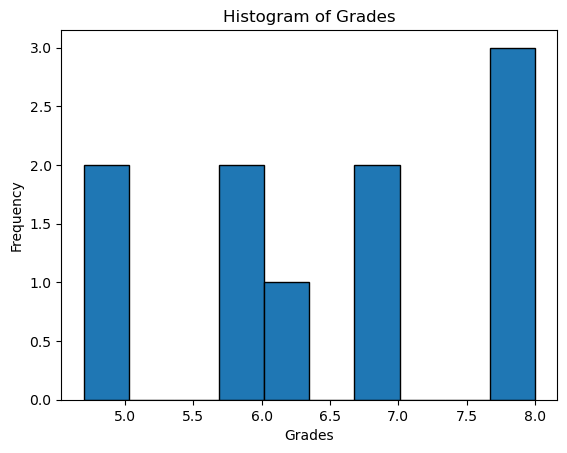

-------------------
Students who took both class in the Spring:
count    8.000000
mean     6.150000
std      1.704616
min      3.000000
25%      5.225000
50%      6.700000
75%      7.025000
max      8.000000
Name: totalGPA, dtype: float64


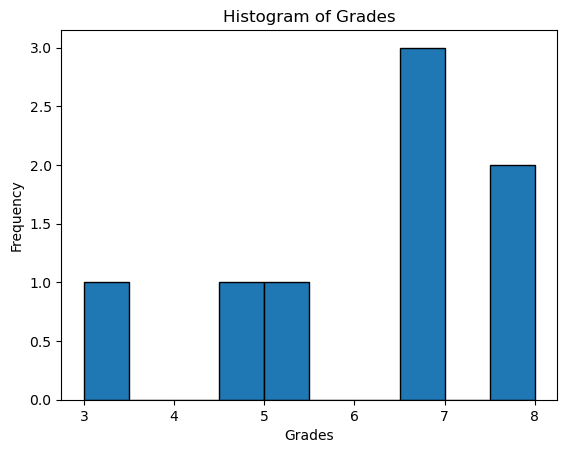

-------------------
Students who took CS in the Fall and MATH in the Spring
count    5.000000
mean     5.940000
std      0.750333
min      4.700000
25%      6.000000
50%      6.000000
75%      6.300000
max      6.700000
Name: totalGPA, dtype: float64


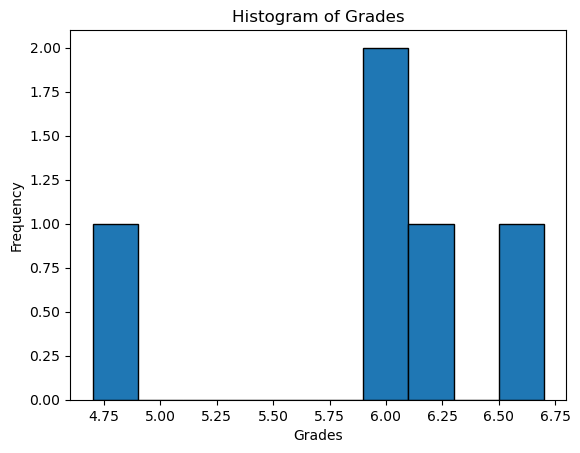

-------------------
Students who took MATH in the Fall and CS in the Spring
count    17.000000
mean      6.394118
std       1.482595
min       2.700000
25%       6.000000
50%       6.300000
75%       7.700000
max       8.000000
Name: totalGPA, dtype: float64


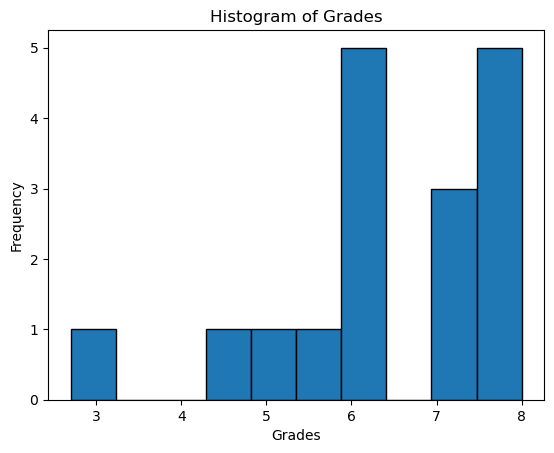

-------------------


In [107]:
class1 = {"Subject" : "CS", "Course Number" : 167}
class2 = {"Subject" : "MATH", "Course Number" : 126}

compare_two_full(class1, class2)

The function "compare_two" distills the results of the previous function into a few lines. This uses the median of the "totalGPA" distribution for each pairing to determine the best combination. This function also has the variable "least", which is used to determine if I should print the least optimal strategy for this pairing. I use this function later and the "least of the best" wasn't necessary. 

In [7]:
#Compare two classes and output optimal strategy


def compare_two(class_info1, class_info2, least = 1):
    #medians is a dictionary that holds the median values for each pairing. The key is the name of the pairing
    # (both_fall, both_spring, fall1, fall2)
    medians = {}
    
    #cumulate all grade info for each class, then split into fall and spring datasets for each
    grade_info_class1 = grades[(grades["Subject"] == class_info1["Subject"]) & (grades["Course Number"] == class_info1["Course Number"])]
    class1fall =  grade_info_class1[grade_info_class1['Term'].str.contains('FA')]
    class1spring =  grade_info_class1[grade_info_class1['Term'].str.contains('SP')]
    grade_info_class2 = grades[(grades["Subject"] == class_info2["Subject"]) & (grades["Course Number"] == class_info2["Course Number"])]
    class2fall =  grade_info_class2[grade_info_class2['Term'].str.contains('FA')]
    class2spring =  grade_info_class2[grade_info_class2['Term'].str.contains('SP')]

    # merge the fall datasets, then create the added GPA variable
    both_fall = class1fall.merge(class2fall, on='Student ID')
    both_fall["totalGPA"] = both_fall["Grade_x"] + both_fall["Grade_y"]

    # repeat process for both_spring, fall1, fall2
    both_spring = class1spring.merge(class2spring, on='Student ID')
    both_spring["totalGPA"] = both_spring["Grade_x"] + both_spring["Grade_y"]
    fall1 = class1fall.merge(class2spring, on='Student ID')
    fall1["totalGPA"] = fall1["Grade_x"] + fall1["Grade_y"]
    fall2 = class2fall.merge(class1spring, on='Student ID')
    fall2["totalGPA"] = fall2["Grade_x"] + fall2["Grade_y"]
    
    #find median values for each pairing, then add it to our dictionary.
    medians["both_fall"] = both_fall["totalGPA"].median()
    medians["both_spring"] = both_spring["totalGPA"].median()
    medians["fall1"] = fall1["totalGPA"].median()
    medians["fall2"] = fall2["totalGPA"].median()
    
    #print medians helps get a sense of the medians as a whole (possible gaps, outliers, etc.)
    print(medians)
    
    #prints the total number of students who took both classes
    print("There are " + str(len(grade_info_class1.merge(grade_info_class2, on='Student ID'))) + " students who took this combination.")
    
    #find the maximum and minimum GPA medians. Saves its as both_fall, both_spring, fall1, fall2
    max_med = max(medians, key=medians.get)
    min_med = min(medians, key=medians.get)
    
    #temporary string which shortens the print statement length
    rec = "We recommend taking "
    
    #for grammar purposes, I had each print statement be its own line.
    if max_med == "both_fall":
        print(rec + "both classes, " + class_info1["Subject"] + str(class_info1["Course Number"]) + " and " + class_info2["Subject"] + str(class_info2["Course Number"])  + ", in the fall.")
    if max_med == "both_spring":
        print(rec + "both classes, " + class_info1["Subject"] + str(class_info1["Course Number"]) + " and " +  class_info2["Subject"] + str(class_info2["Course Number"]) + ", in the spring.")
    if max_med == "fall1":
        print(rec + class_info1["Subject"] + str(class_info1["Course Number"]) + " in the fall and " + class_info2["Subject"] + str(class_info2["Course Number"]) + " in the spring.")
    if max_med == "fall2":
        print(rec + class_info2["Subject"] + str(class_info2["Course Number"]) + " in the fall and " + class_info1["Subject"] + str(class_info1["Course Number"]) + " in the spring.")
    print("Students who do this have a median success score of " + str(medians[max_med]))
    
    #if the least variable is 1, it will produce the worst strategy. 
    if least == 1:   
        print()
        nrec = "The least favorable strategy is taking "
        if min_med == "both_fall":
            print(nrec + "both classes, " + class_info1["Subject"] + str(class_info1["Course Number"]) + " and " + class_info2["Subject"] + str(class_info2["Course Number"])  + ", in the fall.")
        if min_med == "both_spring":
            print(nrec + "both classes, " + class_info1["Subject"] + str(class_info1["Course Number"]) + " and " +  class_info2["Subject"] + str(class_info2["Course Number"]) + ", in the spring.")
        if min_med == "fall1":
            print(nrec + class_info1["Subject"] + str(class_info1["Course Number"]) + " in the fall and " + class_info2["Subject"] + str(class_info2["Course Number"]) + " in the spring.")
        if min_med == "fall2":
            print(nrec + class_info2["Subject"] + str(class_info2["Course Number"]) + " in the fall and " + class_info1["Subject"] + str(class_info1["Course Number"]) + " in the spring.")
        print("Students who do this have a median success score of " + str(medians[min_med]))


    

Here are some fairly interesting examples of the above function in action.

In [8]:
class1 = {"Subject" : "PSYC", "Course Number" : 110}
class2 = {"Subject" : "MATH", "Course Number" : 126}

compare_two(class1, class2, 1)

{'both_fall': 7.0, 'both_spring': 6.65, 'fall1': 6.7, 'fall2': 6.7}
There are 410 students who took this combination.
We recommend taking both classes, PSYC110 and MATH126, in the fall.
Students who do this have a median success score of 7.0

The least favorable strategy is taking both classes, PSYC110 and MATH126, in the spring.
Students who do this have a median success score of 6.65


In [9]:
class1 = {"Subject" : "PSYC", "Course Number" : 110}
class2 = {"Subject" : "MATH", "Course Number" : 225}

compare_two(class1, class2, 1)

{'both_fall': 7.15, 'both_spring': 7.0, 'fall1': 7.0, 'fall2': 7.15}
There are 157 students who took this combination.
We recommend taking both classes, PSYC110 and MATH225, in the fall.
Students who do this have a median success score of 7.15

The least favorable strategy is taking both classes, PSYC110 and MATH225, in the spring.
Students who do this have a median success score of 7.0


In [10]:
class1 = {"Subject" : "ENGL", "Course Number" : 220}
class2 = {"Subject" : "PSYC", "Course Number" : 110}

compare_two(class1, class2, 1)

{'both_fall': 7.3, 'both_spring': 6.65, 'fall1': 7.0, 'fall2': 7.2}
There are 6 students who took this combination.
We recommend taking both classes, ENGL220 and PSYC110, in the fall.
Students who do this have a median success score of 7.3

The least favorable strategy is taking both classes, ENGL220 and PSYC110, in the spring.
Students who do this have a median success score of 6.65


In [11]:
class1 = {"Subject" : "ENGL", "Course Number" : 220}
class2 = {"Subject" : "MATH", "Course Number" : 126}

compare_two(class1, class2, 1)

{'both_fall': 5.7, 'both_spring': 6.3, 'fall1': nan, 'fall2': 6.35}
There are 4 students who took this combination.
We recommend taking MATH126 in the fall and ENGL220 in the spring.
Students who do this have a median success score of 6.35

The least favorable strategy is taking both classes, ENGL220 and MATH126, in the fall.
Students who do this have a median success score of 5.7


In [12]:
class1 = {"Subject" : "ENGL", "Course Number" : 220}
class2 = {"Subject" : "MATH", "Course Number" : 125}

compare_two(class1, class2, 1)

{'both_fall': 6.3, 'both_spring': nan, 'fall1': 5.7, 'fall2': 5.949999999999999}
There are 4 students who took this combination.
We recommend taking both classes, ENGL220 and MATH125, in the fall.
Students who do this have a median success score of 6.3

The least favorable strategy is taking ENGL220 in the fall and MATH125 in the spring.
Students who do this have a median success score of 5.7


In [13]:
class1 = {"Subject" : "ENGL", "Course Number" : 178}
class2 = {"Subject" : "MATH", "Course Number" : 125}

compare_two(class1, class2, 1)

{'both_fall': 6.7, 'both_spring': 5.7, 'fall1': 7.3, 'fall2': 6.3}
There are 66 students who took this combination.
We recommend taking ENGL178 in the fall and MATH125 in the spring.
Students who do this have a median success score of 7.3

The least favorable strategy is taking both classes, ENGL178 and MATH125, in the spring.
Students who do this have a median success score of 5.7


In [14]:
class1 = {"Subject" : "CS", "Course Number" : 167}
class2 = {"Subject" : "MATH", "Course Number" : 125}

compare_two(class1, class2, 1)

{'both_fall': 6.7, 'both_spring': 5.0, 'fall1': 6.7, 'fall2': 6.3}
There are 38 students who took this combination.
We recommend taking both classes, CS167 and MATH125, in the fall.
Students who do this have a median success score of 6.7

The least favorable strategy is taking both classes, CS167 and MATH125, in the spring.
Students who do this have a median success score of 5.0


In [15]:
class1 = {"Subject" : "CS", "Course Number" : 167}
class2 = {"Subject" : "MATH", "Course Number" : 126}

compare_two(class1, class2, 1)

{'both_fall': 6.65, 'both_spring': 6.7, 'fall1': 6.0, 'fall2': 6.3}
There are 43 students who took this combination.
We recommend taking both classes, CS167 and MATH126, in the spring.
Students who do this have a median success score of 6.7

The least favorable strategy is taking CS167 in the fall and MATH126 in the spring.
Students who do this have a median success score of 6.0


In [16]:
class1 = {"Subject" : "CS", "Course Number" : 167}
class2 = {"Subject" : "MATH", "Course Number" : 225}

compare_two(class1, class2, 1)

{'both_fall': 7.0, 'both_spring': 7.3, 'fall1': 6.85, 'fall2': 7.85}
There are 30 students who took this combination.
We recommend taking MATH225 in the fall and CS167 in the spring.
Students who do this have a median success score of 7.85

The least favorable strategy is taking CS167 in the fall and MATH225 in the spring.
Students who do this have a median success score of 6.85


Next, I will be solving the issue of finding the best possible course to pair with a given course. The user  will see a similar outcome as the previous function, with the minimum students exception. If we didn't set a minimum students, then a single student with an odd schedule might skew the data. Alternatively, if the bar is too high then only the most popular courses would be recommended. 

Note: the following function does a minute or so as it looks through every possible course.

In [25]:
#class_list is a list of dictionaries of the unique class information. GENS is removed. Other two are temporary variables.
temp_pairs = grades[['Subject', 'Course Number']].drop_duplicates()
classes_dict = temp_pairs.to_dict('records')
class_list = [d for d in classes_dict if not (d['Subject'] == "GENS")]


In [85]:
def find_best(courses):
    
    #courses is a list of  dictionaries with the medians for each fall/spring pair and a "Course Info" key with 
    # the dictionary {"Subject": XXX, "Course Number": Y} as its value
    #returns the class with the highest median. 
    
    
    #sets temporary values. If the this returns 0, then I there was an error.
    max_value = 0
    max_class = 0
    
    #a list of the imporant keyes
    #keys = ["both_fall", "both_spring", "fall1", "fall2"]
    for each_course in courses:
        numeric_values = [v for v in each_course.values() if isinstance(v, (int, float))]
        temp = max(numeric_values)
        if temp > max_value:
            max_value = temp
            max_class = each_course
    #print(max_value)
    return max_class
    

        

def find_best_with_required(class_info1, min_students = 30):
    #possible_courses has course information of courses that meet minimum student requirement.
    possible_courses = []
    #removes the given class from our class_list
    new_list = [d for d in class_list if not (d['Subject'] == class_info1["Subject"] and d['Course Number'] == class_info1["Course Number"])]
    
    #this for loop looks at each class, sees the total number of students who took it and the required
    #and if it is greater than the threshold, its information will be saved to a dictionary then appended to 
    #possible_courses.
    for class_info2 in new_list:
        grade_info_class1 = grades[(grades["Subject"] == class_info1["Subject"]) & (grades["Course Number"] == class_info1["Course Number"])]
        grade_info_class2 = grades[(grades["Subject"] == class_info2["Subject"]) & (grades["Course Number"] == class_info2["Course Number"])]
        if len(grade_info_class1.merge(grade_info_class2, on='Student ID')) > min_students:
            medians = {}
            class1fall = grade_info_class1[grade_info_class1['Term'].str.contains('FA')]
            class1spring =  grade_info_class1[grade_info_class1['Term'].str.contains('SP')]
            class2fall =  grade_info_class2[grade_info_class2['Term'].str.contains('FA')]
            class2spring =  grade_info_class2[grade_info_class2['Term'].str.contains('SP')]
            both_fall = class1fall.merge(class2fall, on='Student ID')
            both_fall["totalGPA"] = both_fall["Grade_x"] + both_fall["Grade_y"]
            both_spring = class1spring.merge(class2spring, on='Student ID')
            both_spring["totalGPA"] = both_spring["Grade_x"] + both_spring["Grade_y"]
            fall1 = class1fall.merge(class2spring, on='Student ID')
            fall1["totalGPA"] = fall1["Grade_x"] + fall1["Grade_y"]
            fall2 = class2fall.merge(class1spring, on='Student ID')
            fall2["totalGPA"] = fall2["Grade_x"] + fall2["Grade_y"]
            medians["both_fall"] = both_fall["totalGPA"].median()
            medians["both_spring"] = both_spring["totalGPA"].median()
            medians["fall1"] = fall1["totalGPA"].median()
            medians["fall2"] = fall2["totalGPA"].median()
            medians["Class Info"] = class_info2
            possible_courses.append(medians)
    #finds the best course of all elligible courses
    best_class = find_best(possible_courses)
    #prints the number of courses that meet the threshold.
    print("There are " + str(len(possible_courses)) + " pairs of courses that have at least " + str(min_students)  + " students. The best combination of these is " + best_class["Class Info"]["Subject"] + str(best_class["Class Info"]["Course Number"]) + ".")
    #prints the information about the best class.
    compare_two(best_class["Class Info"], class2, 0)
    return()

Here are some interesting examples of the function in action.

In [86]:
class2 = {"Subject" : "MATH", "Course Number" : 125}

find_best_with_required(class2)


There are 66 pairs of courses that have at least 30 students. The best combination of these is MUS241.
{'both_fall': 7.0, 'both_spring': nan, 'fall1': 7.3, 'fall2': nan}
There are 50 students who took this combination.
We recommend taking MUS241 in the fall and MATH125 in the spring.
Students who do this have a median success score of 7.3


()

In [87]:
class2 = {"Subject" : "MATH", "Course Number" : 225}

find_best_with_required(class2)
#compare_two(find_best_with_required(class2)["Class Info"], class2)

There are 46 pairs of courses that have at least 30 students. The best combination of these is MUS125.
{'both_fall': 7.550000000000001, 'both_spring': 7.0, 'fall1': 7.3, 'fall2': 8.0}
There are 37 students who took this combination.
We recommend taking MATH225 in the fall and MUS125 in the spring.
Students who do this have a median success score of 8.0


()

In [88]:
class2 = {"Subject" : "ENGL", "Course Number" : 178}

find_best_with_required(class2, 25)
#compare_two(find_best_with_required(class2)["Class Info"], class2)

There are 22 pairs of courses that have at least 25 students. The best combination of these is MUS241.
{'both_fall': 7.7, 'both_spring': nan, 'fall1': 7.7, 'fall2': nan}
There are 26 students who took this combination.
We recommend taking both classes, MUS241 and ENGL178, in the fall.
Students who do this have a median success score of 7.7


()

In [ ]:
class2 = {"Subject" : "POL", "Course Number" : 124}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "ARTS", "Course Number" : 115}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "BIOL", "Course Number" : 111}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "ARTS", "Course Number" : 130}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "CS", "Course Number" : 167}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "GNDS", "Course Number" : 100}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "ENVS", "Course Number" : 120}

find_best_with_required(class2)

In [ ]:
class2 = {"Subject" : "SPAN", "Course Number" : 205}

find_best_with_required(class2, 27)

In [ ]:
class2 = {"Subject" : "CS", "Course Number" : 270}

find_best_with_required(class2, 11)

Finally, I'll look at finding the best possible match to a given course with specific subjects in mind. This code operates similarly, except it creates a new dataframe for each subject and searches for the best match in that. Then, it prints the best matches.

I also have the option of creating a bar chart for all possible fall/spring pairings of all courses that meet the minimum student requirement.

In [90]:
def create_bar(courses):
    df = pd.DataFrame(courses)
    df = pd.concat([df.drop(['Class Info'], axis=1), df['Class Info'].apply(pd.Series)], axis=1)

    #create a new column 'SubjectNumber' combining 'Subject' and 'Number'
    df['SubjectNumber'] = df['Subject'] + df['Course Number'].astype(str)

    #reorganize the dataframe so that th
    df_melt = df.melt(id_vars='SubjectNumber', value_vars=['both_fall', 'both_spring', 'fall1', 'fall2'], var_name='time', value_name='median_GPA')

# sort values for better visualization
    df_melt.sort_values(by='median_GPA', inplace=True)

# Create the barchart
    color_dict = {'both_fall': 'blue', 'both_spring': 'green', 'fall1': 'red', 'fall2': 'purple'}
    plt.figure(figsize=(10, 5))
    plt.barh(df_melt['SubjectNumber'] + ' - ' + df_melt['time'], df_melt['median_GPA'], color=df_melt['time'].map(color_dict))
    plt.xlabel('Median GPA')
    plt.title('Median GPA for each fall/spring pair')
    plt.tight_layout()
    plt.show()

def required_course_with_desired_subjects(class_info1, desired_subjects, min_students = 30, bar = 0):
    temp_pairs = grades[['Subject', 'Course Number']].drop_duplicates()
    classes_dict = temp_pairs.to_dict('records')

    #temp_course_list will have all courses for a specific subject
    temp_course_list = []
    #possible_courses has the grade/course information for courses that meet the size requirement.
    possible_courses = []
    #best_courses has information on the best courses. Each key is the subject, each value is a dictionary of the medians and course information. 
    best_courses = {}
    #used in visualization
    all_courses = []
    for sub in desired_subjects:
        #reset temporary variables
        temp_course_list = []
        possible_courses = []
        #choose courses of the given subject
        temp_course_list = temp_course_list + [d for d in classes_dict if  (d['Subject'] == sub)]
        for class_info2 in temp_course_list:
            grade_info_class1 = grades[(grades["Subject"] == class_info1["Subject"]) & (grades["Course Number"] == class_info1["Course Number"])]
            grade_info_class2 = grades[(grades["Subject"] == class_info2["Subject"]) & (grades["Course Number"] == class_info2["Course Number"])]
            #if a course meets the size threshold
            if len(grade_info_class1.merge(grade_info_class2, on='Student ID')) > min_students:
                #medians is a dictionary that has the median values for each course.
                medians = {}
                #same process from above to find the median values
                class1fall = grade_info_class1[grade_info_class1['Term'].str.contains('FA')]
                class1spring =  grade_info_class1[grade_info_class1['Term'].str.contains('SP')]
                class2fall =  grade_info_class2[grade_info_class2['Term'].str.contains('FA')]
                class2spring =  grade_info_class2[grade_info_class2['Term'].str.contains('SP')]
                both_fall = class1fall.merge(class2fall, on='Student ID')
                both_fall["totalGPA"] = both_fall["Grade_x"] + both_fall["Grade_y"]
                both_spring = class1spring.merge(class2spring, on='Student ID')
                both_spring["totalGPA"] = both_spring["Grade_x"] + both_spring["Grade_y"]
                fall1 = class1fall.merge(class2spring, on='Student ID')
                fall1["totalGPA"] = fall1["Grade_x"] + fall1["Grade_y"]
                fall2 = class2fall.merge(class1spring, on='Student ID')
                fall2["totalGPA"] = fall2["Grade_x"] + fall2["Grade_y"]
                
                #append the median values to the dict as well as course information
                medians["both_fall"] = both_fall["totalGPA"].median()
                medians["both_spring"] = both_spring["totalGPA"].median()
                medians["fall1"] = fall1["totalGPA"].median()
                medians["fall2"] = fall2["totalGPA"].median()
                medians["Class Info"] = class_info2
                #add that to possible courses
                possible_courses.append(medians)
        #find the best option of all courses we added for that subject
        best_courses[sub] = find_best(possible_courses)
        if bar == 1:
            all_courses = all_courses + possible_courses
        #best_courses[sub] will equal 0 if there was no course that met the size requirement (min_students is too high, not a real subject)
        if best_courses[sub] == 0:
            print("For the subject " + sub +  ", there were no course pairs that had at least " + str(min_students)  + " taking the required course.")
        # otherwises prints the information about the best course.
        else:
            print("For the subject " + sub +  ", there are " + str(len(possible_courses)) + " pairs of courses that have at least " + str(min_students)  + " students. The best combination of these is " + best_courses[sub]["Class Info"]["Subject"] + str(best_courses[sub]["Class Info"]["Course Number"]) + ".")
            compare_two(best_courses[sub]["Class Info"], class2, 1)
    if bar == 1:
        create_bar(all_courses)
 
    

Here are a few examples of using this function. 

For the subject PSYC, there are 1 pairs of courses that have at least 20 students. The best combination of these is PSYC110.
{'both_fall': 7.0, 'both_spring': 6.65, 'fall1': 6.7, 'fall2': 6.7}
There are 410 students who took this combination.
We recommend taking both classes, PSYC110 and MATH126, in the fall.
Students who do this have a median success score of 7.0

The least favorable strategy is taking both classes, PSYC110 and MATH126, in the spring.
Students who do this have a median success score of 6.65
For the subject SOC, there are 2 pairs of courses that have at least 20 students. The best combination of these is SOC117.
{'both_fall': 7.0, 'both_spring': 6.4, 'fall1': 6.0, 'fall2': 6.7}
There are 61 students who took this combination.
We recommend taking both classes, SOC117 and MATH126, in the fall.
Students who do this have a median success score of 7.0

The least favorable strategy is taking SOC117 in the fall and MATH126 in the spring.
Students who do this have a median suc

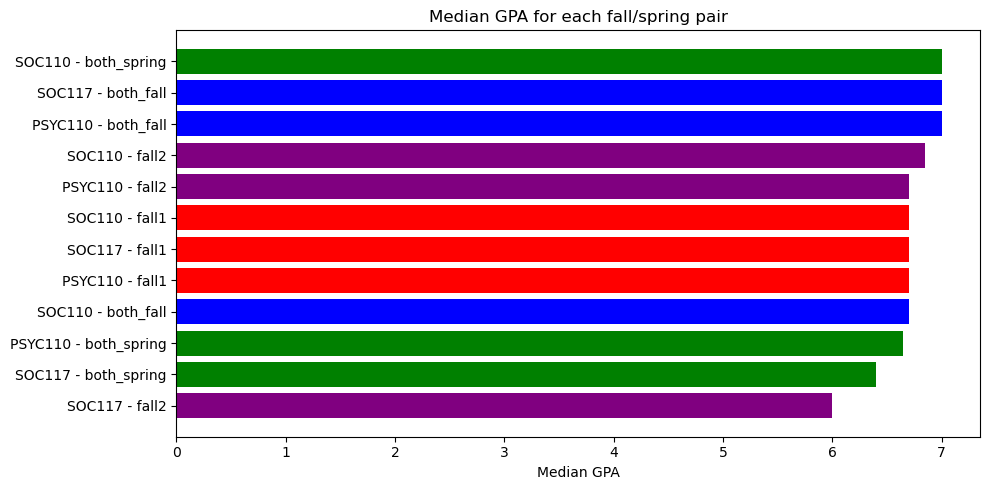

In [91]:

class2 = {"Subject" : "MATH", "Course Number" : 126}


required_course_with_desired_subjects(class2, ["PSYC", "SOC"], min_students = 20, bar = 1)

For the subject SOC, there are 2 pairs of courses that have at least 10 students. The best combination of these is SOC117.
{'both_fall': 7.0, 'both_spring': 6.4, 'fall1': 6.0, 'fall2': 6.7}
There are 61 students who took this combination.
We recommend taking both classes, SOC117 and MATH126, in the fall.
Students who do this have a median success score of 7.0

The least favorable strategy is taking SOC117 in the fall and MATH126 in the spring.
Students who do this have a median success score of 6.0
For the subject ENGL, there are 7 pairs of courses that have at least 10 students. The best combination of these is ENGL178.
{'both_fall': 6.15, 'both_spring': 7.15, 'fall1': 6.7, 'fall2': 6.0}
There are 51 students who took this combination.
We recommend taking both classes, ENGL178 and MATH126, in the spring.
Students who do this have a median success score of 7.15

The least favorable strategy is taking MATH126 in the fall and ENGL178 in the spring.
Students who do this have a median succ

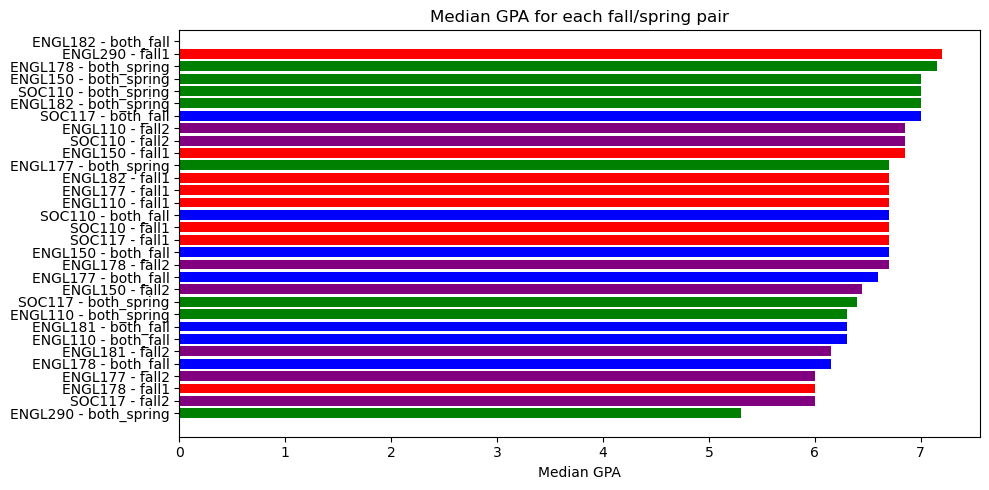

In [92]:
class2 = {"Subject" : "MATH", "Course Number" : 126}

required_course_with_desired_subjects(class2, ["SOC", "ENGL"], min_students =  10, bar = 1)

In [93]:
class2 = {"Subject" : "PHYS", "Course Number" : 155}

required_course_with_desired_subjects(class2, ["ENVS", "HIST", "PSYC", "MATH"], min_students = 15)

For the subject ENVS, there are 1 pairs of courses that have at least 15 students. The best combination of these is ENVS120.
{'both_fall': 7.15, 'both_spring': nan, 'fall1': nan, 'fall2': 6.7}
There are 17 students who took this combination.
We recommend taking both classes, ENVS120 and PHYS155, in the fall.
Students who do this have a median success score of 7.15

The least favorable strategy is taking PHYS155 in the fall and ENVS120 in the spring.
Students who do this have a median success score of 6.7
For the subject HIST, there were no course pairs that had at least 15 taking the required course.
For the subject PSYC, there are 1 pairs of courses that have at least 15 students. The best combination of these is PSYC110.
{'both_fall': 7.15, 'both_spring': nan, 'fall1': nan, 'fall2': 6.3}
There are 59 students who took this combination.
We recommend taking both classes, PSYC110 and PHYS155, in the fall.
Students who do this have a median success score of 7.15

The least favorable stra

In [94]:
class2 = {"Subject" : "CS", "Course Number" : 167}

required_course_with_desired_subjects(class2, ["HIST", "SOC", "PSYC", "ENGL"], min_students = 1)

For the subject HIST, there are 7 pairs of courses that have at least 1 students. The best combination of these is HIST181.
{'both_fall': 6.35, 'both_spring': nan, 'fall1': 6.0, 'fall2': nan}
There are 6 students who took this combination.
We recommend taking both classes, HIST181 and CS167, in the fall.
Students who do this have a median success score of 6.35

The least favorable strategy is taking HIST181 in the fall and CS167 in the spring.
Students who do this have a median success score of 6.0
For the subject SOC, there are 3 pairs of courses that have at least 1 students. The best combination of these is SOC278.
{'both_fall': 6.3, 'both_spring': nan, 'fall1': 8.0, 'fall2': nan}
There are 2 students who took this combination.
We recommend taking SOC278 in the fall and CS167 in the spring.
Students who do this have a median success score of 8.0

The least favorable strategy is taking both classes, SOC278 and CS167, in the fall.
Students who do this have a median success score of 6.

In [95]:
class2 = {"Subject" : "BIOL", "Course Number" : 111}

required_course_with_desired_subjects(class2, ["POL", "CHEM", "PSYC", "MATH"], min_students = 15)

For the subject POL, there were no course pairs that had at least 15 taking the required course.
For the subject CHEM, there are 8 pairs of courses that have at least 15 students. The best combination of these is CHEM245.
{'both_fall': 6.0, 'both_spring': 6.7, 'fall1': nan, 'fall2': 7.4}
There are 45 students who took this combination.
We recommend taking BIOL111 in the fall and CHEM245 in the spring.
Students who do this have a median success score of 7.4

The least favorable strategy is taking both classes, CHEM245 and BIOL111, in the fall.
Students who do this have a median success score of 6.0
For the subject PSYC, there are 1 pairs of courses that have at least 15 students. The best combination of these is PSYC110.
{'both_fall': 7.7, 'both_spring': 6.7, 'fall1': 6.7, 'fall2': 6.4}
There are 135 students who took this combination.
We recommend taking both classes, PSYC110 and BIOL111, in the fall.
Students who do this have a median success score of 7.7

The least favorable strategy

In [96]:
class2 = {"Subject" : "ENGL", "Course Number" : 150}

required_course_with_desired_subjects(class2, ["POL", "SOC", "PSYC", "MATH"], min_students = 15)

For the subject POL, there were no course pairs that had at least 15 taking the required course.
For the subject SOC, there are 2 pairs of courses that have at least 15 students. The best combination of these is SOC110.
{'both_fall': 6.7, 'both_spring': 7.2, 'fall1': 7.0, 'fall2': 7.85}
There are 19 students who took this combination.
We recommend taking ENGL150 in the fall and SOC110 in the spring.
Students who do this have a median success score of 7.85

The least favorable strategy is taking both classes, SOC110 and ENGL150, in the fall.
Students who do this have a median success score of 6.7
For the subject PSYC, there are 1 pairs of courses that have at least 15 students. The best combination of these is PSYC110.
{'both_fall': 7.3, 'both_spring': 6.7, 'fall1': 7.0, 'fall2': 7.35}
There are 52 students who took this combination.
We recommend taking ENGL150 in the fall and PSYC110 in the spring.
Students who do this have a median success score of 7.35

The least favorable strategy i

### Reflection

I was really happy with this project. I was worried that the analysis would recommend students to take easy classes or the answers would be predictable, but there was a lot of variety in the outcomes. 

There were several issues I noticed. Some are systematic and others deal with lack of resources:

1) Measuring success. A students GPA is not a measurement of its value, particularly with a grand scope of one's education at Whitman. Likewise, the median added is not a complete metric and has likely produced misleading results. For example, a value of 6.5 doesn't sound too bad, but if students were consistently getting a 4.0 in one class and 2.5 in the other this metric sounds worse.
2) Recommending very easy or difficult classes. Recommending "easy" classes is a fairly obvious conclusion. I don't think this is bad, as not every class needs to be difficult. However, this project shouldn't be a roundabout way to measure easiness. I also noted that this system will recommend taking hard class like Calc 3 and Advanced Chem because students who took this class did well because they were likely prepared/had experience.
3) Scaling to other years. The function of scheduling is very different in later years, as students will tend to make decisions based on what they need rather than what they are purely interested in. Therefore, incorporating student data from later years might change the question (also students gain experience by their sophomore year, so they might be better students compared to first years).
4) The more fine-tuned the question, the less data you have. While it would be great to look at Majors v. non-majors and how they schedule their courses, I'm already on thin ice in terms application. If I tried to parce the data more beyond this level, we reach a point where none of it is inferrable. 
5) Not believing in students to take difficult classes. Finally, I imagine actually using this process might be saying "Hey, I don't think you should take Calc 2 because your GPA will be 0.4 worse." While students may want to know to some degree, too much "following of the algorithm" might derail a students curiousity.


There are tons of further analysis one could do. I'd be curious to see if there is any similar software at larger universities which may have more data to pull from. My most immediate next step would be to compare different subjects and find the best pairing from there. I could also try to form the best possible given all of the recommendations. The problem is that is no longer a pure highest value comparison, as I should likely take into account the number of students backing the median. I'd also like to do internal comparisons for each recommendation to see if it truly is the best.

In terms of Above and Beyond, I'd describe the depth of my functions as going beyond what is required. It took me a long time to figure out the best way to make somewhat scalable functions that were also fairly intuitive in their outcomes.
